# Example of DOV search methods for borehole samples (grondmonsters)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_grondmonsters.ipynb)

## Use cases explained below
* Get borehole samples in a bounding box
* Get borehole samples with specific properties
* Get borehole samples in a bounding box based on specific properties
* Select borehole samples in a municipality and return depth
* Get borehole samples, returning fields not available in the standard output dataframe

In [1]:
%matplotlib inline
import inspect, sys

In [2]:
# check pydov path
import pydov

## Get information about the datatype 'Grondmonster'

In [3]:
from pydov.search.grondmonster import GrondmonsterSearch
grondmonster = GrondmonsterSearch()

A description is provided for the 'Grondmonster' datatype:

In [4]:
print(grondmonster.get_description())

Grondmonsters in DOV zijn monsters die gekoppeld zijn aan een boring. Deze grondmonsters zijn gekenmerkt door een diepte ten opzichte van het maaiveld en door de manier van staalname. De geografische ligging (X en Y (mL72) en Z (mTAW)) nemen ze over van de gekoppelde boring. Aan deze grondmonsters zijn laboproeven, namelijk resultaten afkomstig van analyses in het laboratorium of enkel referenties naar bepaalde analyses, gekoppeld. De analyseresultaten van de monsters kunnen zeer divers zijn, namelijk onderkenningsproeven met centraal de korrelgrootteverdeling maar ook plasticiteitsgrenzen en humus- en kalkgehalte, metingen van volumemassa- en watergehalte en referenties van doorlatendheid, samendrukbaarheid en schuifweerstandkarakteristieken, glauconietgehalte en steenkoolanalyses. De gegevens van de monsters en de laboresultaten kunnen worden geëxporteerd in een rapport.


The different fields that are available for objects of the 'Grondmonster' datatype can be requested with the get_fields() method:

In [5]:
fields = grondmonster.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

id
naam
pkey_grondmonster
gekoppeld_aan
pkey_parents
materiaalklasse
diepte_van_m
diepte_tot_m
aantal_observaties
datum
monstersamenstelling
monstertype
bemonsteringsprocedure
bemonsteringsinstrument
bemonstering_door
opmerkingen
actuele_opslaglocatie
opdracht
permkey_monster
geom
astm_naam
grondsoort_bggg
humusgehalte
kalkgehalte
uitrolgrens
vloeigrens
glauconiet_totaal
korrelvolumemassa
volumemassa
watergehalte
methode
diameter
fractie


Alternatively, you can list all the fields and their details by inspecting the `get_fields()` output or the search instance itself in a notebook:

In [6]:
grondmonster

## Example use cases

### Get borehole samples in a bounding box

Get data for all the boreholes that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [7]:
from pydov.util.location import Within, Box

df = grondmonster.search(location=Within(Box(122000, 187000, 124000, 189000, epsg=31370)))
df.head()

[000/001] .
[000/039] .......................................


,pkey_grondmonster,naam,pkey_parents,datum,diepte_van_m,diepte_tot_m,monstertype,monstersamenstelling,astm_naam,grondsoort_bggg,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet_totaal,korrelvolumemassa,volumemassa,watergehalte,methode,diameter,fractie
0,https://www.dov.vlaanderen.be/data/monster/201...,12,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,5.5,6.0,ongeroerd,Enkelvoudig monster,NaN,weinig kleih. fijnzand,...,0.8,17.4,21.0,NaN,2.65,2.025,20.1,Korrelverdeling d.m.v. hydrometer/areometer,0.0017,93.5
1,https://www.dov.vlaanderen.be/data/monster/201...,12,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,5.5,6.0,ongeroerd,Enkelvoudig monster,NaN,weinig kleih. fijnzand,...,0.8,17.4,21.0,NaN,2.65,2.025,20.1,Korrelverdeling d.m.v. hydrometer/areometer,0.0072,92.1
2,https://www.dov.vlaanderen.be/data/monster/201...,12,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,5.5,6.0,ongeroerd,Enkelvoudig monster,NaN,weinig kleih. fijnzand,...,0.8,17.4,21.0,NaN,2.65,2.025,20.1,Korrelverdeling d.m.v. hydrometer/areometer,0.0091,91.5
3,https://www.dov.vlaanderen.be/data/monster/201...,12,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,5.5,6.0,ongeroerd,Enkelvoudig monster,NaN,weinig kleih. fijnzand,...,0.8,17.4,21.0,NaN,2.65,2.025,20.1,Korrelverdeling d.m.v. hydrometer/areometer,0.0143,91.2
4,https://www.dov.vlaanderen.be/data/monster/201...,12,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,5.5,6.0,ongeroerd,Enkelvoudig monster,NaN,weinig kleih. fijnzand,...,0.8,17.4,21.0,NaN,2.65,2.025,20.1,Korrelverdeling d.m.v. hydrometer/areometer,0.0247,90.1


The dataframe contains borehole samples from 6 boreholes The available data are flattened to represent unique attributes per row of the dataframe.

Using the *pkey_grondmonster* field one can request the details of this borehole in a webbrowser:
https://www.dov.vlaanderen.be/data/monster/*pkey_grondmonster*

In [8]:
for pkey_grondmonster in set(df.head().pkey_grondmonster):
    print(pkey_grondmonster)

https://www.dov.vlaanderen.be/data/monster/2017-180443


There were 10 samples taken from the above borehole, each identified by its own URI.

### Get borehole samples with specific properties

Next to querying borehole samples based on their geographic location within a bounding box, we can also search for borehole samples matching a specific set of properties. For this we can build a query using a combination of the 'Grondmonster' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [9]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes2'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsEqualTo* operator to find 10 borehole samples where *monstertype* is 'geroerd':

In [10]:
from owslib.fes2 import PropertyIsEqualTo

query = PropertyIsEqualTo(propertyname='monstertype',
                          literal='geroerd')
df = grondmonster.search(query=query, max_features=10)

df.head()

[000/001] .
[000/010] ..........


,pkey_grondmonster,naam,pkey_parents,datum,diepte_van_m,diepte_tot_m,monstertype,monstersamenstelling,astm_naam,grondsoort_bggg,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet_totaal,korrelvolumemassa,volumemassa,watergehalte,methode,diameter,fractie
0,https://www.dov.vlaanderen.be/data/monster/201...,0,[https://www.dov.vlaanderen.be/data/boring/199...,1996-06-01,79.0,79.0,geroerd,Enkelvoudig monster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korrelverdeling d.m.v. zeefproef,0.063,14.94
1,https://www.dov.vlaanderen.be/data/monster/201...,0,[https://www.dov.vlaanderen.be/data/boring/199...,1996-06-01,79.0,79.0,geroerd,Enkelvoudig monster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korrelverdeling d.m.v. zeefproef,0.090,13.10
2,https://www.dov.vlaanderen.be/data/monster/201...,0,[https://www.dov.vlaanderen.be/data/boring/199...,1996-06-01,79.0,79.0,geroerd,Enkelvoudig monster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korrelverdeling d.m.v. zeefproef,0.125,10.38
3,https://www.dov.vlaanderen.be/data/monster/201...,0,[https://www.dov.vlaanderen.be/data/boring/199...,1996-06-01,79.0,79.0,geroerd,Enkelvoudig monster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korrelverdeling d.m.v. zeefproef,0.180,3.84
4,https://www.dov.vlaanderen.be/data/monster/201...,0,[https://www.dov.vlaanderen.be/data/boring/199...,1996-06-01,79.0,79.0,geroerd,Enkelvoudig monster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korrelverdeling d.m.v. zeefproef,0.250,1.36


Once again we can use the *pkey_grondmonster* as a permanent link to the information of these borehole samples:

In [11]:
for pkey_grondmonster in set(df.head().pkey_grondmonster):
    print(pkey_grondmonster)

https://www.dov.vlaanderen.be/data/monster/2017-127061


### Get borehole samples in a bounding box based on specific properties

We can combine a query on attributes with a query on geographic location to get the borehole samples within a bounding box that have specific properties.

The following example requests the borehole samples with a depth greater than or equal to 15 meters within the given bounding box.

(Note that the datatype of the *literal* parameter should be a string, regardless of the datatype of this field in the output dataframe.)

In [12]:
from owslib.fes2 import PropertyIsGreaterThanOrEqualTo

query = PropertyIsGreaterThanOrEqualTo(
            propertyname='diepte_tot_m',
            literal='15')

df = grondmonster.search(
    location=Within(Box(122000, 187000, 124000, 189000, epsg=31370)),
    query=query
    )

df.head()

[000/001] .
[000/005] ccccc


,pkey_grondmonster,naam,pkey_parents,datum,diepte_van_m,diepte_tot_m,monstertype,monstersamenstelling,astm_naam,grondsoort_bggg,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet_totaal,korrelvolumemassa,volumemassa,watergehalte,methode,diameter,fractie
0,https://www.dov.vlaanderen.be/data/monster/201...,39A,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,17.0,17.37,ongeroerd,Enkelvoudig monster,NaN,weinig kalkh. leemh. fijnzand,...,5.5,20.0,30.200001,NaN,2.65,1.955,20.299999,Korrelverdeling d.m.v. hydrometer/areometer,0.0017,92.2
1,https://www.dov.vlaanderen.be/data/monster/201...,39A,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,17.0,17.37,ongeroerd,Enkelvoudig monster,NaN,weinig kalkh. leemh. fijnzand,...,5.5,20.0,30.200001,NaN,2.65,1.955,20.299999,Korrelverdeling d.m.v. hydrometer/areometer,0.0069,88.6
2,https://www.dov.vlaanderen.be/data/monster/201...,39A,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,17.0,17.37,ongeroerd,Enkelvoudig monster,NaN,weinig kalkh. leemh. fijnzand,...,5.5,20.0,30.200001,NaN,2.65,1.955,20.299999,Korrelverdeling d.m.v. hydrometer/areometer,0.0103,87.7
3,https://www.dov.vlaanderen.be/data/monster/201...,39A,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,17.0,17.37,ongeroerd,Enkelvoudig monster,NaN,weinig kalkh. leemh. fijnzand,...,5.5,20.0,30.200001,NaN,2.65,1.955,20.299999,Korrelverdeling d.m.v. hydrometer/areometer,0.0150,86.0
4,https://www.dov.vlaanderen.be/data/monster/201...,39A,[https://www.dov.vlaanderen.be/data/boring/200...,2002-03-04,17.0,17.37,ongeroerd,Enkelvoudig monster,NaN,weinig kalkh. leemh. fijnzand,...,5.5,20.0,30.200001,NaN,2.65,1.955,20.299999,Korrelverdeling d.m.v. hydrometer/areometer,0.0248,79.8


### Link borehole samples with boreholes

A borehole sample can be linked to different *parents*. It can be linked to one or more boreholes, or even other borehole samples.

#### Find boreholes from borehole samples

To find the boreholes based on a given dataframe with borehole samples, you can use the `Join` query operator:

In [13]:
from pydov.util.query import Join

from pydov.search.grondmonster import GrondmonsterSearch
from pydov.search.boring import BoringSearch

gm_search = GrondmonsterSearch()
b_search = BoringSearch()

grondmonster_df = gm_search.search(
    max_features=5, return_fields=('pkey_grondmonster', 'pkey_parents'))
grondmonster_df

[000/001] .


,pkey_grondmonster,pkey_parents
0,https://www.dov.vlaanderen.be/data/monster/201...,[https://www.dov.vlaanderen.be/data/boring/199...
1,https://www.dov.vlaanderen.be/data/monster/201...,[https://www.dov.vlaanderen.be/data/boring/199...
2,https://www.dov.vlaanderen.be/data/monster/201...,[https://www.dov.vlaanderen.be/data/boring/199...
3,https://www.dov.vlaanderen.be/data/monster/201...,[https://www.dov.vlaanderen.be/data/boring/198...
4,https://www.dov.vlaanderen.be/data/monster/201...,[https://www.dov.vlaanderen.be/data/boring/198...


In [14]:
boring_df = b_search.search(query=Join(grondmonster_df, on='pkey_boring', using='pkey_parents'))
boring_df

[000/001] .
[000/005] .....


,pkey_boring,boornummer,x,y,mv_mtaw,start_boring_mtaw,gemeente,diepte_boring_van,diepte_boring_tot,datum_aanvang,uitvoerder,boorgatmeting,diepte_methode_van,diepte_methode_tot,boormethode
0,https://www.dov.vlaanderen.be/data/boring/1996...,kb26d78e-B249,236820.0,181175.0,90.5,90.50,Zutendaal,0.0,200.7,1996-06-01,Peeters-Ramsel,True,0.0,200.7,spoelboring
1,https://www.dov.vlaanderen.be/data/boring/1981...,kb17d32w-B380,214069.5,216345.4,47.0,47.00,Lommel,0.0,20.0,1981-05-17,onbekend,False,0.0,20.0,onbekend
2,https://www.dov.vlaanderen.be/data/boring/1999...,kb23d73w-B386,153903.0,178252.0,13.0,13.00,Machelen,0.0,36.5,1999-05-06,GEOLAB,False,0.0,36.5,droge boring
3,https://www.dov.vlaanderen.be/data/boring/1998...,GEO-98/060-B1,160032.9,175678.8,NaN,59.97,NaN,0.0,7.0,1998-05-20,MVG - Afdeling Geotechniek,False,0.0,7.0,ramkernboring
4,https://www.dov.vlaanderen.be/data/boring/1980...,kb5d11e-B287,78776.0,226370.0,4.9,4.90,Knokke-Heist,0.0,440.9,1980-01-01,Smet - Dessel,True,0.0,440.9,gestoken boring




#### Find borehole samples from boreholes

To find the borehole samples based on a given dataframe with boreholes, you can use the `FuzzyJoin` query operator. This will make sure you get all the borehole samples which are (at least partly) linked to one of the boreholes:


In [15]:
from pydov.util.query import FuzzyJoin

from pydov.search.grondmonster import GrondmonsterSearch
from pydov.search.boring import BoringSearch

gm_search = GrondmonsterSearch()
b_search = BoringSearch()

boring_df = b_search.search(
    max_features=5, return_fields=('pkey_boring', 'boornummer'))
boring_df

[000/001] .


,pkey_boring,boornummer
0,https://www.dov.vlaanderen.be/data/boring/2016...,kb29d84e-B574
1,https://www.dov.vlaanderen.be/data/boring/2016...,kb29d84e-B575
2,https://www.dov.vlaanderen.be/data/boring/1945...,kb22d55e-B1037
3,https://www.dov.vlaanderen.be/data/boring/2016...,kb29d84e-B576
4,https://www.dov.vlaanderen.be/data/boring/2016...,kb29d84e-B577


In [16]:
grondmonster_df = gm_search.search(query=FuzzyJoin(boring_df, on='pkey_parents', using='pkey_boring'))
grondmonster_df

[000/000] .

,pkey_grondmonster,naam,pkey_parents,datum,diepte_van_m,diepte_tot_m,monstertype,monstersamenstelling,astm_naam,grondsoort_bggg,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet_totaal,korrelvolumemassa,volumemassa,watergehalte,methode,diameter,fractie


### Select borehole samples in a municipality and return depth

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the borehole samples in the city of Ghent and return their depth:

In [17]:
from owslib.etree import etree
from owslib.wfs import WebFeatureService
from owslib.fes import PropertyIsEqualTo as PropertyIsEqualTo_fes1
from pydov.util.location import GmlFilter

gemeentegrenzen = WebFeatureService(
    'https://geo.api.vlaanderen.be/VRBG/wfs',
    version='1.1.0')

naam_filter = PropertyIsEqualTo_fes1(propertyname='NAAM', literal='Gent')

gemeente_gml = gemeentegrenzen.getfeature(
    typename='VRBG:Refgem',
    filter=etree.tostring(naam_filter.toXML()).decode("utf8"),
    outputFormat='text/xml; subtype=gml/3.2').read()

df = grondmonster.search(
    location=GmlFilter(gemeente_gml, Within),
    return_fields=('diepte_tot_m',))

df.head()

[000/001] .


,diepte_tot_m
0,1.5
1,18.5
2,1.5
3,33.4
4,19.4


In [18]:
df.describe()

,diepte_tot_m
count,1879.000000
mean,8.966115
std,7.714421
min,0.300000
25%,3.000000
50%,6.450000
75%,13.000000
max,45.250000


Text(0.5, 1.0, 'Depth distribution borehole samples in Gent')

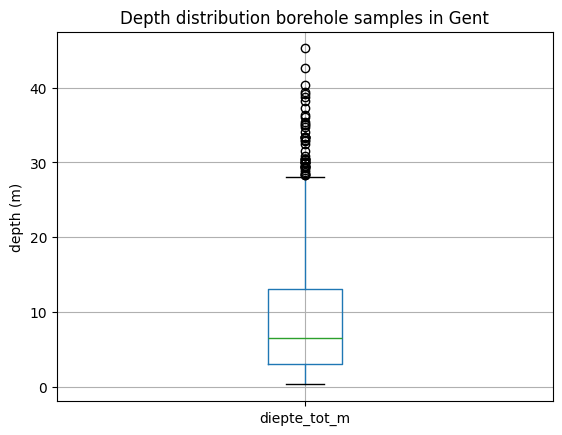

In [19]:
ax = df[df.diepte_tot_m != 0].boxplot()
ax.set_ylabel("depth (m)")
ax.set_title("Depth distribution borehole samples in Gent")

## Get borehole samples, returning fields not available in the standard output dataframe

To keep the output dataframe size acceptable, not all available WFS fields are included in the standard output. However, one can use this information to select borehole samples as illustrated below.

For example, make a selection of the borehole samples in the municipality of Antwerp of type 'geroerd'.

In [20]:
from owslib.etree import etree
from owslib.wfs import WebFeatureService
from owslib.fes import PropertyIsEqualTo as PropertyIsEqualTo_fes1

from pydov.types.fields import GeometryReturnField
from pydov.util.location import GmlFilter

gemeentegrenzen = WebFeatureService(
    'https://geo.api.vlaanderen.be/VRBG/wfs',
    version='1.1.0')

naam_filter = PropertyIsEqualTo_fes1(propertyname='NAAM', literal='Antwerpen')

gemeente_gml = gemeentegrenzen.getfeature(
    typename='VRBG:Refgem',
    filter=etree.tostring(naam_filter.toXML()).decode("utf8"),
    outputFormat='text/xml; subtype=gml/3.2').read()

query = PropertyIsEqualTo(propertyname='monstertype', literal='geroerd')

df = grondmonster.search(
    location=GmlFilter(gemeente_gml, Within),
    query=query,
    return_fields=('pkey_grondmonster', 'naam', 'gekoppeld_aan', 'opslaglocatie', 'materiaalklasse', 'bemonsteringsprocedure', GeometryReturnField('geom', 31370)))
df.head()

ImportError: cannot import name 'GeometryReturnField' from 'pydov.types.fields' (c:\users\rubenvijverman\pycharmprojects\pydov\pydov\types\fields.py)

Following the URI of the borehole sample, one can access the available information:

In [ ]:
for pkey_grondmonster in set(df.head().pkey_grondmonster):
    print(pkey_grondmonster)

## Visualize results

Using Folium, we can display the results of our search on a map.

In [ ]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
import geopandas as gpd

In [ ]:
geo_df = gpd.GeoDataFrame(df.head(20), geometry='geom', crs='EPSG:31370')
popup = folium.GeoJsonPopup(fields=["naam", 'gekoppeld_aan'])
geo_json = folium.GeoJson(data=geo_df, popup=popup)

In [ ]:
# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(zoom_start=12)
geo_json.add_to(fmap)

fmap.fit_bounds(fmap.get_bounds())
fmap